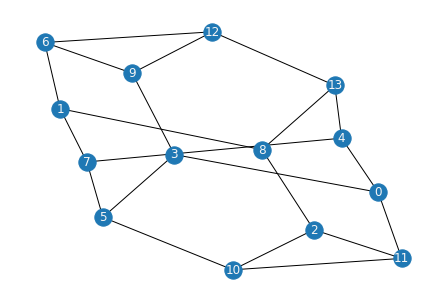

In [1]:
from maxcut_instance_generator import regular_graph

graph, model = regular_graph(num_nodes=14, degree=3, draw=True)

In [10]:
from encoding import RandomAccessEncoder

# Quantum Random Access Encoders
qrac_1 = RandomAccessEncoder(3, 1)
qrac_2 = RandomAccessEncoder(3, 1)

# Hamiltonians
H_1 = qrac_1.generate_hamiltonian(model)
H_2 = qrac_2.generate_hamiltonian(model)

# Print Hamiltonians
print(qrac_1.print_hamiltonian(H_1))

(1.5+0j)XIXII
(1.5+0j)XIYII
(1.5+0j)XIIIY
(1.5+0j)YIZII
(1.5+0j)YIIIX
(1.5+0j)YIIXI
(1.5+0j)ZIIXI
(1.5+0j)ZIIYI
(1.5+0j)ZIIIY
(1.5+0j)IXXII
(1.5+0j)IYXII
(1.5+0j)IIYIX
(1.5+0j)IZYII
(1.5+0j)IXIIX
(1.5+0j)IXIYI
(1.5+0j)IYZII
(1.5+0j)IIZIZ
(1.5+0j)IZIXI
(1.5+0j)IYIIZ
(1.5+0j)IIIYY
(1.5+0j)IZIIZ
(-10.5+0j)IIIII
None


In [11]:
print(len(qrac_1.qubit_to_vertex_map), len(qrac_1.calculate_edge_among_qubits(model)))

5 8


In [12]:
import numpy as np
from vqe import VQEForQRAO

from scipy.optimize import minimize

vqe_0 = VQEForQRAO(
    hamiltonian=H_1,
    entanglement="random",
    num_layer=0,
    qubit_pairs=qrac_1.calculate_edge_among_qubits(model),
    rotation_gate="efficientSU2",
    method="NFT",
    options=None,
    printing=None,
)
vqe_1 = VQEForQRAO(
    hamiltonian=H_1,
    entanglement="random",
    num_layer=1,
    qubit_pairs=qrac_1.calculate_edge_among_qubits(model),
    rotation_gate="efficientSU2",
    method="NFT",
    options=None,
    printing=None,
)
vqe_1_2 = VQEForQRAO(
    hamiltonian=H_2,
    entanglement="random",
    num_layer=1,
    qubit_pairs=qrac_2.calculate_edge_among_qubits(model),
    rotation_gate="efficientSU2",
    method="NFT",
    options=None,
    printing=None,
)
cost_history_0, best_theta_list_0 = vqe.minimize()
cost_history_1, best_theta_list_1 = vqe.minimize()
cost_history_1_2, best_theta_list_1_2 = vqe.minimize()

In [5]:
hamiltonian_matrix = qrac.get_hamiltonian_matrix(H)

from numpy.linalg import eigh

w, v = eigh(hamiltonian_matrix)

print("opt: ", w[0], ", sol: ", cost_history[-1], ", ", cost_history[-1])

opt:  -21.914651554510552 , sol:  -12.411099053629473 ,  -12.411099053629473


In [6]:
from qulacs import QuantumState

state_vqe = vqe._make_state(best_theta_list)
state_opt_vec = v[:, 0]
state_vqe_vec = state_vqe.get_vector()
from qiskit.quantum_info import state_fidelity, Statevector

print("OPT:", state_opt_vec)
print("VQE:", state_vqe_vec)
print(
    "fidelity:", state_fidelity(Statevector(state_opt_vec), Statevector(state_vqe_vec))
)
state_opt = QuantumState(3)
state_opt.load(state_opt_vec)
print("OPT ENERGY:", H.get_expectation_value(state_opt), w[0])
print("VQE ENERGY:", H.get_expectation_value(state_vqe))

OPT: [-7.31828428e-05+0.j          6.41246121e-02-0.01337294j
  1.49595877e-01+0.17085763j -7.36846519e-02-0.10823509j
 -2.85414146e-01+0.04071969j  6.73285118e-02-0.09634666j
 -2.05937668e-01+0.13558657j  5.18047721e-02-0.25751245j
  3.27100879e-02+0.03097468j  4.68766157e-03-0.01874039j
  4.35254920e-02-0.15057334j -7.74091655e-02-0.04207321j
  2.18973036e-01+0.07230449j -6.35261848e-02+0.01371148j
  2.15766478e-01+0.20960707j -1.42495373e-02-0.01094504j
 -2.32805816e-01-0.14858627j -6.38462727e-02+0.06364309j
 -8.72014188e-02-0.04592117j  1.46566603e-01-0.01635493j
  1.80692891e-01+0.03207499j -1.66027173e-03+0.24530563j
  7.72852521e-02+0.02448126j  3.80191103e-02+0.07531938j
  1.19644098e-01+0.21485726j  1.26925296e-01+0.0045394j
 -8.59007631e-02+0.18314609j  2.55421197e-03+0.03627774j
 -1.95510757e-01-0.16316515j  1.65634128e-02-0.23875136j
 -1.97145444e-02-0.14811475j  1.57123813e-01-0.07693296j]
VQE: [-0.05787932-0.00963265j  0.09748941-0.16334325j -0.06904149+0.07162764j
 -0.1

Error: QuantumStateCpu::load(vector<Complex>&): invalid length of state
Error: GeneralQuantumOperator::get_expectation_value(const QuantumStateBase*): invalid qubit count


In [9]:
print(len(cost_history_0))
print(len(cost_history_1))
print(len(cost_history_1_2))

505


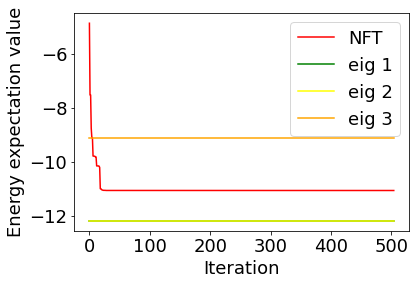

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["font.size"] = 18
plt.plot(cost_history, color="red", label="NFT")
plt.plot(
    [w[0] for i in range(max(len(cost_history), len(cost_history)))],
    color="green",
    label="eig 1",
)
plt.plot(
    [w[1] for i in range(max(len(cost_history), len(cost_history)))],
    color="yellow",
    label="eig 2",
)
plt.plot(
    [w[2] for i in range(max(len(cost_history), len(cost_history)))],
    color="orange",
    label="eig 3",
)

plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

In [10]:
from rounding import MagicRounding, PauliRounding

mr = MagicRounding(3, 1, 1000, vqe, qrac)
pr = PauliRounding(3, 1, 1000, vqe, qrac)

sol_counts_mr = mr.round(best_theta_list)
sol_counts_pr = pr.round(best_theta_list)

In [11]:
maxcut_vals_mr = mr.get_objective_value_counts(model, sol_counts_mr)
maxcut_vals_pr = pr.get_objective_value(model, sol_counts_pr)

print(maxcut_vals_mr)
print(maxcut_vals_pr)

{6.0: 257, 7.0: 236, 5.0: 150, 8.0: 125, 4.0: 83, 3.0: 80, 9.0: 44, 10.0: 16, 0.0: 9}
3.0


In [12]:
model.solve().get_objective_value()

10.0